Depth Anything V2 

Create a Venv in the terminal to be used for this notebook.

run:
 
python -m venv venv_name

source venv_name/bin/activate

Then assign the venv to this notebook

In [3]:
%pip install ipykernel
%pip install gitpython


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import git
git.Repo.clone_from('https://github.com/DepthAnything/Depth-Anything-V2', 'Depth-Anything-V2')

<git.repo.base.Repo '/transfer/s5708799/ASE_Project/Image Data/Depth-Anything-V2/.git'>

In [5]:
%cd Depth-Anything-V2
%pip install -r requirements.txt

/transfer/s5708799/ASE_Project/Image Data/Depth-Anything-V2


/transfer/s5708799/ASE_Project/programming-project-ofayed/DA2/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


  Using cached gradio_imageslider-0.0.20-py3-none-any.whl.metadata (10 kB)
  Using cached gradio-4.29.0-py3-none-any.whl.metadata (15 kB)
  Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp312-cp312-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached gradio_client-0.16.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached MarkupSafe-2.1.5-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.0 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pillow-10.4.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached PyYAML-6.0.2-cp

In [7]:
%pip install transformers

  Using cached regex-2024.11.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 50.4 MB/s eta 0:00:00
Using cached regex-2024.11.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (796 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
os.chdir("..")
!pwd

/transfer/s5708799/ASE_Project/Image Data
/transfer/s5708799/ASE_Project/Image Data


/transfer/s5708799/ASE_Project/programming-project-ofayed/DA2/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Make sure the current directory is Image Data/

Device set to use cuda:0


Test Images/Input/Input_1.png


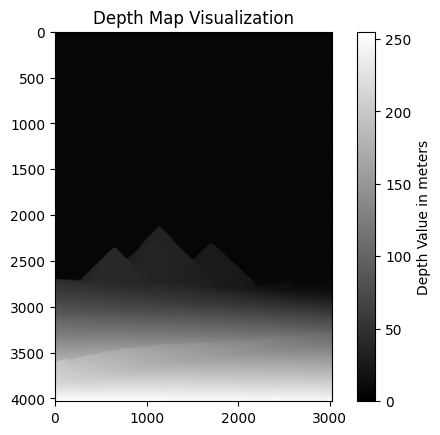

In [40]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import torch
import glob
import os
from depth_anything_v2.dpt import DepthAnythingV2
import numpy as np
import json

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Large-hf")



# Specify the directory path
directory_path = 'Test Images/Input/'

# Use glob to find all .png files in the directory and its subdirectories
png_files = glob.glob(os.path.join(directory_path, '**', '*.png'), recursive=True)




# Print all .png files
for file in png_files:
    print(file)
    image = Image.open(file)
    depth_map = pipe(image)["depth"]
    depth_map.save("Test Images/Output/Depth_map.png")

    depth_map_data = np.array(depth_map)

    for i in range(len(depth_map_data)):
        for j in range(len(depth_map_data[i])):
            depth_map_data[i][j] = 1.0 - depth_map_data[i][j]

    inverse_depth_map = Image.fromarray(depth_map_data)       
    inverse_depth_map.save("Test Images/Output/Inverse_Depth_map.png")
   

    plt.imshow(depth_map, cmap='gray') 
    plt.colorbar(label='Depth Value in meters')
    plt.title('Depth Map Visualization')
    plt.show()

    # #Exporting as .npy file
    # npy_file = file.replace('.png', '.npy')
    # np.save(npy_file, depth_map)

    # #Exporting as .json file
    # arr_list = depth_map.tolist()
    # jfile = file.replace('.png', '.json')
    # with open(jfile, 'w') as json_file:
    #     print(jfile)
    #     json.dump(arr_list, json_file)

